In [1]:
# Use the command below to install any dependencies your system is missing
!pip install -q scipy

import sys
import numpy
import matplotlib
import pandas
import sklearn
import seaborn
import scipy

print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(numpy.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('Pandas : {}'.format(pandas.__version__))
print('Scikit-Learn : {}'.format(sklearn.__version__))
print('Seaborn : {}'.format(seaborn.__version__))
print('Scipy : {}'.format(scipy.__version__))

Python : 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Numpy : 1.16.4
Matplotlib : 3.1.0
Pandas : 0.24.2
Scikit-Learn : 0.21.2
Seaborn : 0.9.0
Scipy : 1.2.1


In [2]:
# Giving alias to libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset
data = pd.read_csv('creditcard.csv')

In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
# The names v1 to v28 is used to secure personal details, obtained from PCA dimensionality reduction
print(data.shape)
print(data.describe)

(284807, 31)
<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0 

In [7]:
# Take a small sample of data to reduce computational cost
data = data.sample(frac = 0.1, random_state = 1)
print(data.shape)

(2848, 31)


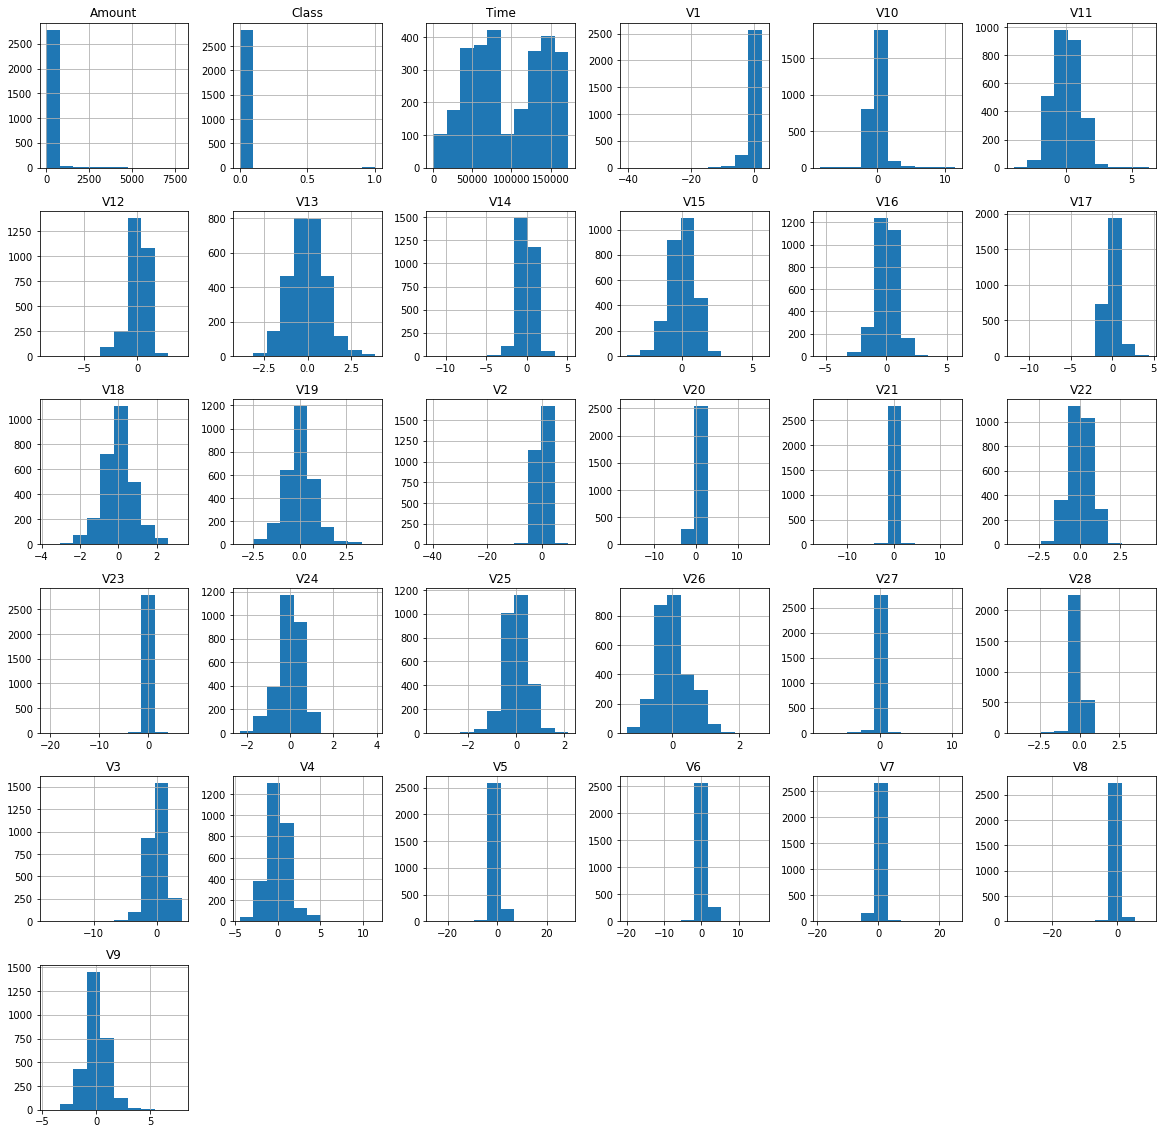

In [8]:
data.hist(figsize = (20, 20))
plt.show()

In [10]:
# Let us calculate how many fraud transactions are there to get outliar fraction
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outliar_fraction = len(fraud)/float(len(valid))
print(outliar_fraction)


print('Fraud Cases :: {}'.format(len(fraud)))
print('Valid Cases :: {}'.format(len(valid)))

0.0017587055926837848
Fraud Cases :: 5
Valid Cases :: 2843


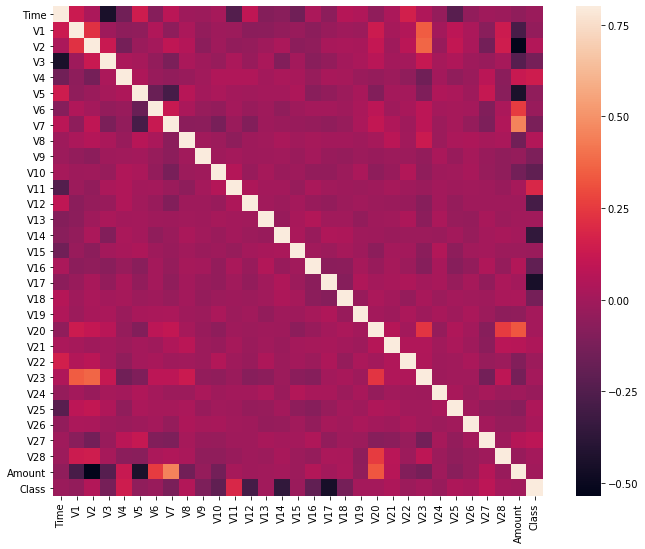

In [11]:
# Building correlation matrix to find any linear relationships
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [12]:
# Seperating the data in independent and output variables
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target = 'Class'

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(2848, 30)
(2848,)


In [19]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest # Returns anomaly score of each sample. Randomly selects features and creates splits in the data
from sklearn.neighbors import LocalOutlierFactor # Calculates local anomaly score : How isolated a point is wrt it's neighbors

# Define a random state
state = 1

# Define outliar detection algorithms
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X),contamination = outliar_fraction),
    "Local Outliar Factor": LocalOutlierFactor(n_neighbors = 20,contamination = outliar_fraction)
}

In [24]:
# Fit the models by cycling through a for loop
n_outliars = len(fraud)

for i, (clf_name, clf)in enumerate(classifiers.items()):
    # Fit the data and tag outliars
    if clf_name == "Local Outliar Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # Reshaping the prediction
    y_pred[y_pred == 1] = 0 # Inliars - SAFE
    y_pred[y_pred == -1] = 1 # Outliars - FRAUD
    
    n_errors = (y_pred != Y).sum()
    
    # Running classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Isolation Forest: 9
0.9968398876404494
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2843
           1       0.17      0.20      0.18         5

    accuracy                           1.00      2848
   macro avg       0.58      0.60      0.59      2848
weighted avg       1.00      1.00      1.00      2848

Local Outliar Factor: 11
0.9961376404494382
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2843
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2848
   macro avg       0.50      0.50      0.50      2848
weighted avg       1.00      1.00      1.00      2848



C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
